In [ ]:
from copy import deepcopy
from aocd import get_data
from collections import deque
import math
import re


inp="""1,0,1~1,2,1
0,0,2~2,0,2
0,2,3~2,2,3
0,0,4~0,2,4
2,0,5~2,2,5
0,1,6~2,1,6
1,1,8~1,1,9"""

inp=get_data(day=22, year=2023)
inp=inp.split('\n')

B=[]
for b in inp:
    l,r=b.split('~')
    B.append(([int(i) for i in l.split(',')],[int(i) for i in r.split(',')]))

def swapz(b):
    z1=b[0][2]
    z2=b[1][2]
    if z1>z2:
        return((b[1],b[0]))
    else:
        return(b)

def checkbricks():
    # only bricks in one direction?
    for b in B:
        dx=abs(b[0][0]-b[1][0])
        dy=abs(b[0][1]-b[1][1])
        dz=b[1][2]-b[0][2]
        if dz<0:
            print(b)
        if (dx>0 and dy==0 and dz==0) or (dx==0 and dy>0 and dz==0) or (dx==0 and dy==0 and dz>0):
            pass
        else:
            print(b,dx,dy,dz)

def rrange(a):
    x_min=min(a[0][0],a[1][0])
    y_min=min(a[0][1],a[1][1])
    x_max=max(a[0][0],a[1][0])
    y_max=max(a[0][1],a[1][1])
    if x_min>x_max:
        (x_min,x_max)=(x_max,x_min)
    if y_min>y_max:
        (y_min,y_max)=(y_max,y_min)
    A=set()
    for x in range(x_min,x_max+1):
        for y in range(y_min,y_max+1):
            A.add((x,y))    
    return A
    
def over(a,b):
    A=rrange(a)
    B=rrange(b)
    return A.intersection(B)

B.sort(key=lambda b:b[0][2])
#BB=deepcopy(B[:30])
BB=deepcopy(B)
nB=len(BB)
# for b in B:
#     b=swapz(b)
#checkbricks()


#plotbricks(BB)
for i,b in enumerate(BB):
    z=1
    for bb in BB[:i]:
        if over(b,bb):
            z=max(z,bb[1][2]+1)
        old_z=b[0][2]
        b[1][2]=b[1][2]-old_z+z
        b[0][2]=z
        
 # brick[5] -= brick[2] - max_z
 #    brick[2] = max_z

BB.sort(key=lambda b:b[0][2])
            
#plotbricks(BB)

up=[[] for i in range(nB)]
down=[[] for i in range(nB)]

for i,b1 in enumerate(BB):
    for j,b2 in enumerate(BB):
        #bovenkant
        if over(b1,b2) and b1[0][2]==b2[1][2]+1: # b1 boven b2
            up[j].append(i)
            down[i].append(j)
tot=0
dis=[]
for i in range(nB):
    support=True
    cnt=0
    for j in up[i]:
        if len(down[j])>1:
            cnt+=1
    if cnt==len(up[i]):
        tot+=1
        dis.append(i)
#plotbricks(BB,dis=dis)
print(tot)

In [352]:
from collections import deque
critical=set(i for i in range(nB))-set(dis)
tot=0



for i in critical:
    Q=deque([i])
    steun=[len(down[ii]) for ii in range(nB)]
    fall=set()
    while Q:
        j=Q.popleft()
        #print(j)
        for ii in up[j]:
            steun[ii]-=1
            if steun[ii]==0:
                fall.add(ii)
                Q.append(ii)
    tot+=len(fall)
    print(i,fall)
print(tot)

0 {1, 2, 3, 4, 5, 6}
5 {6}
7


fout: 96565

In [340]:
plotbricks(BB,dis=dis)

In [295]:
import plotly.graph_objects as go
import numpy as np
def cubes(size, pos_x, pos_y, pos_z, color):
    # create points
    x, y, z = np.meshgrid(
        np.linspace(pos_x-size/2, pos_x+size/2, 2), 
        np.linspace(pos_y-size/2, pos_y+size/2, 2), 
        np.linspace(pos_z-size/2, pos_z+size/2, 2),
    )
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    
    return go.Mesh3d(x=x, y=y, z=z, alphahull=1, flatshading=True, color=color, lighting={'diffuse': 0.1, 'specular': 2.0, 'roughness': 0.5})

def brick(i,b, color):
    # create points
    size=1
       
    x, y, z = np.meshgrid(
        np.linspace(size*b[0][0]-0.5*size, size*b[1][0]+0.5*size, 2), 
        np.linspace(size*b[0][1]-0.5*size, size*b[1][1]+0.5*size, 2), 
        np.linspace(size*b[0][2]-0.5*size, size*b[1][2]+0.5*size, 2), 
        
    )
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    #print(x,y,z)
    return go.Mesh3d(x=x, y=y, z=z,text="%d"%i, alphahull=1, flatshading=True, color=color, lighting={'diffuse': 0.1, 'specular': 2.0, 'roughness': 0.5})

def plotbricks(B,dis=[]):
    fig = go.Figure()
    # set edge length of cubes
    size = 5
    
    # add outer cube
    for i,b in enumerate(B):
        if i in dis:
            fig.add_trace(brick(i,b,'rgba(0,100,0,0.5)'))
        else:
            fig.add_trace(brick(i,b,'rgba(100,0,100,0.5)'))
    
    #fig.show()
    fig.update_layout(
        autosize=False,
        width=600,
        height=600,
    )
    fig.show()

In [122]:
plotbricks(B)

In [80]:
B[0],B[1],B[2]

(([1, 0, 1], [1, 2, 1]), ([0, 0, 2], [2, 0, 2]), ([0, 2, 3], [2, 2, 3]))

In [82]:
b1=B[0]
b2=B[1]
print(min(b2[0][0],b2[1][0]),max(b1[0][0],b1[1][0]) , min(b2[0][1],b2[1][1]),max(b1[0][1],b1[1][1]) )
print(min(b2[0][0],b2[1][0])max(b1[0][0],b1[1][0]) , min(b2[0][1],b2[1][1]),max(b1[0][1],b1[1][1]) )

0 1 0 2


In [ ]:
overlap(const Rect &r1, const Rect &r2)
{
    // The rectangles don't overlap if
    // one rectangle's minimum in some dimension 
    // is greater than the other's maximum in
    // that dimension.

    bool noOverlap = r1.x1 > r2.x2 ||
                     r2.x1 > r1.x2 ||
                     r1.y1 > r2.y2 ||
                     r2.y1 > r1.y2;


In [92]:
touch(B[1],B[2])

True

In [90]:
def touch(b1,b2):
    return not b1[0][0]>b2[1][0] or b2[0][0] > b1[1][0] or b1[0][1] > b2[1][1] or b2[0][1] > b1[1][1]

[-10. -10.  10.  10. -10. -10.  10.  10.] [-10. -10. -10. -10.  10.  10.  10.  10.] [-10.  10. -10.  10. -10.  10. -10.  10.]
[-2.5 -2.5  2.5  2.5 -2.5 -2.5  2.5  2.5] [-2.5 -2.5 -2.5 -2.5  2.5  2.5  2.5  2.5] [-2.5  2.5 -2.5  2.5 -2.5  2.5 -2.5  2.5]
[2.5 2.5 7.5 7.5 2.5 2.5 7.5 7.5] [-2.5 -2.5 -2.5 -2.5  2.5  2.5  2.5  2.5] [-2.5  2.5 -2.5  2.5 -2.5  2.5 -2.5  2.5]
[-7.5 -7.5 -2.5 -2.5 -7.5 -7.5 -2.5 -2.5] [-2.5 -2.5 -2.5 -2.5  2.5  2.5  2.5  2.5] [-2.5  2.5 -2.5  2.5 -2.5  2.5 -2.5  2.5]
[-2.5 -2.5  2.5  2.5 -2.5 -2.5  2.5  2.5] [2.5 2.5 2.5 2.5 7.5 7.5 7.5 7.5] [-2.5  2.5 -2.5  2.5 -2.5  2.5 -2.5  2.5]
[-2.5 -2.5  2.5  2.5 -2.5 -2.5  2.5  2.5] [-7.5 -7.5 -7.5 -7.5 -2.5 -2.5 -2.5 -2.5] [-2.5  2.5 -2.5  2.5 -2.5  2.5 -2.5  2.5]
[-2.5 -2.5  2.5  2.5 -2.5 -2.5  2.5  2.5] [-2.5 -2.5 -2.5 -2.5  2.5  2.5  2.5  2.5] [2.5 7.5 2.5 7.5 2.5 7.5 2.5 7.5]
[-2.5 -2.5  2.5  2.5 -2.5 -2.5  2.5  2.5] [-2.5 -2.5 -2.5 -2.5  2.5  2.5  2.5  2.5] [-7.5 -2.5 -7.5 -2.5 -7.5 -2.5 -7.5 -2.5]


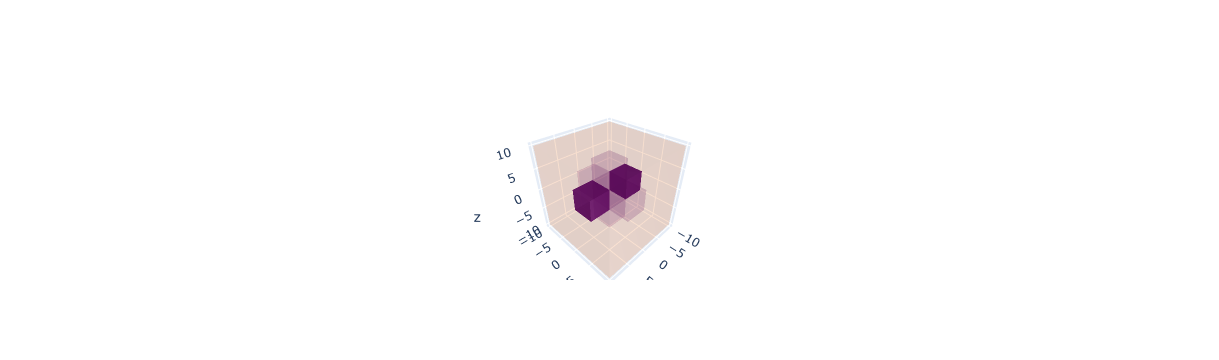

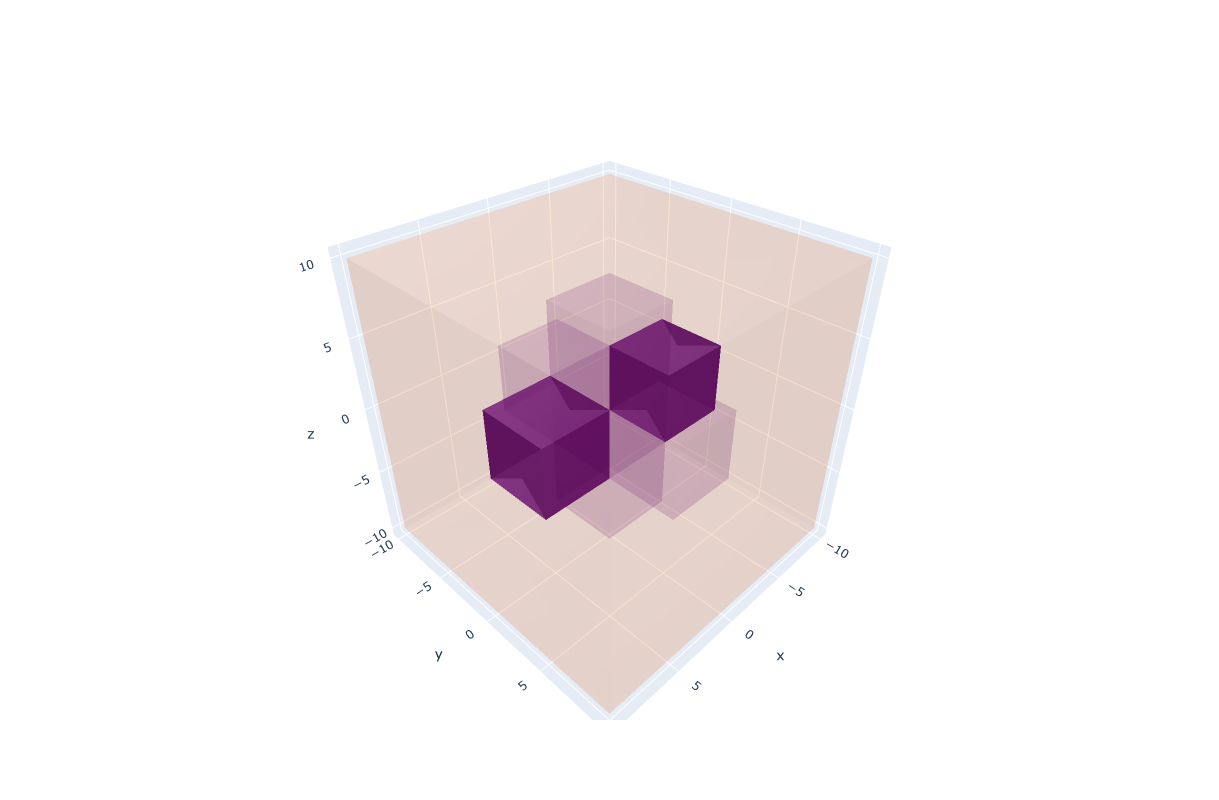

In [27]:
def cubes(size, pos_x, pos_y, pos_z, color):
    # create points
    x, y, z = np.meshgrid(
        np.linspace(pos_x-size/2, pos_x+size/2, 2), 
        np.linspace(pos_y-size/2, pos_y+size/2, 2), 
        np.linspace(pos_z-size/2, pos_z+size/2, 2),
    )
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    print(x,y,z)
    return go.Mesh3d(x=x, y=y, z=z, alphahull=1, flatshading=True, color=color, lighting={'diffuse': 0.1, 'specular': 2.0, 'roughness': 0.5})

fig = go.Figure()
# set edge length of cubes
size = 5

# add outer cube
fig.add_trace(cubes(20,0,0,0, 'rgba(255,100,0,0.1)'))

# add inner center cube
fig.add_trace(cubes(size,0,0,0, 'rgba(100,0,100,0.1)'))

# add inner cubes
fig.add_trace(cubes(size,size,0,0, 'rgba(100,0,100,0.7)'))
fig.add_trace(cubes(size,-size,0,0, 'rgba(100,0,100,0.7)'))

fig.add_trace(cubes(size,0,size,0, 'rgba(100,0,100,0.1)'))
fig.add_trace(cubes(size,0,-size,0, 'rgba(100,0,100,0.1)'))

fig.add_trace(cubes(size,0,0,size, 'rgba(100,0,100,0.1)'))
fig.#add_trace(cubes(size,0,0,-size, 'rgba(100,0,100,0.1)'))


fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

In [23]:
np.linspace(size*b[0][0], size*b[1][0], 2)

array([5., 5.])